In [4]:
import sys
import os

# Check where you are
print("Current directory:", os.getcwd())
sys.path.append(os.getcwd())

from data_visualization import data_vis

Current directory: /workspace
Current directory: /workspace


In [5]:
shapefile_path = 'data_visualization/shapefile_states_ger/NUTS250_N1.shp'
population_data_path = 'data/raw/population_raw.csv'

In [6]:
map_ger_gdf = data_vis.load_shapefile(shapefile_path)
population_df = data_vis.load_population_csv(population_data_path)
population_map_gdf = data_vis.merge_map_population(map_ger_gdf, population_df)

In [7]:
population_map_gdf = data_vis.merge_map_population(map_ger_gdf, population_df)

In [8]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [9]:
# Get all year columns
year_columns = sorted([col for col in population_map_gdf.columns if isinstance(col, int)])

# Calculate global min/max for consistent color scale
vmin = population_map_gdf[year_columns].min().min()
vmax = population_map_gdf[year_columns].max().max()
bounds = population_map_gdf.total_bounds  # [minx, miny, maxx, maxy]

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

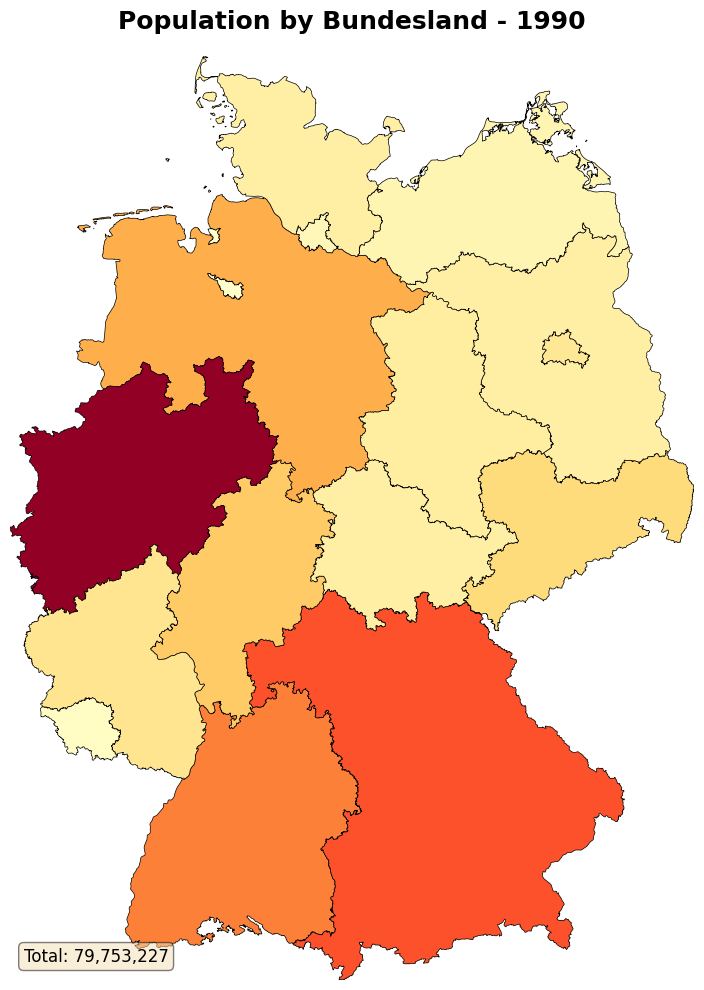

In [10]:
fig, ax = plt.subplots(figsize=(14, 12))
def update(frame):
    ax.clear()
    year = year_columns[frame]
    
    population_map_gdf.plot(
        column=year,
        cmap='YlOrRd',
        ax=ax,
        edgecolor='black',
        linewidth=0.5,
        vmin=vmin,
        vmax=vmax,
        legend_kwds={
            'label': "Population",
            'shrink': 0.6,
            'orientation': 'vertical'
        }
    )
    ax.set_xlim(bounds[0], bounds[2])
    ax.set_ylim(bounds[1], bounds[3])
    
    ax.set_title(f'Population by Bundesland - {year}', 
                 fontsize=18, 
                 fontweight='bold',
                 pad=20)
    ax.axis('off')
    
    # Add total population text
    total_pop = population_map_gdf[year].sum()
    ax.text(0.02, 0.02, f'Total: {total_pop:,.0f}',
            transform=ax.transAxes,
            fontsize=12,
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

anim = animation.FuncAnimation(
    fig, 
    update, 
    frames=len(year_columns),
    interval=100,  # milliseconds between frames
    repeat=True,
    blit=False
)

plt.close

In [ ]:
# Saving animation

print("Saving animation... this may a few seconds")
anim.save('population_evolution.gif', 
         writer='pillow', 
         fps=2,
         dpi=100)
print("Animation saved as 'population_evolution.gif'")
plt.close()


Saving animation... this may take a minute
Animation saved as 'population_evolution.gif'


In [12]:
HTML(anim.to_jshtml())